# Data Wrangling Project
## Table of Contents
- [Introduction](#intro)
- [Project Motivation](#mot)
- [Gathering Data](#gather)
- [Assessing Data](#assess)
- [Cleaning Data](#clean)
- [Storing, Analyzing, and Visualizing Data](#str)
- [Resources](#Resources)

<a id='intro'></a>
## Introduction
Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.


![caption](dog-rates-social.png)
        **Image via <a href="Boston Magazine">Boston Magazine</a>**

<a id='mot'></a>
## Project Motivation
### Context
Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.
### The Data
- **Enhanced Twitter Archive:**

    The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356). I extracted this data programmatically, but I didn't do a very good job. The ratings probably aren't all correct. Same goes for the dog names and probably dog stages (see below for more information on these) too. You'll need to assess and clean these columns if you want to use them for analysis and visualization.
        
        
- **Additional Data via the Twitter API**

    Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But you, because you have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. And guess what? You're going to query Twitter's API to gather this valuable data.
    
    
- **Image Predictions File**

    One more cool thing: I ran every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).
    
### Key points
Key points to keep in mind when data wrangling for this project:

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

**Your tasks in this project are as follows:**

- Data wrangling, which consists of:
    - Gathering data 
    - Assessing data
    - Cleaning data
    - Storing, analyzing, and visualizing your wrangled data
    - Reporting on:
    (1) your data wrangling efforts and (2) your data analyses and visualizations

<a id='gather'></a>
## 1- Gathering Data

In [578]:
import pandas as pd
import numpy as np
import requests
import json

`1.` The WeRateDogs Twitter archive:

In [579]:
WeRateDogs_archive = pd.read_csv('twitter-archive-enhanced-2.csv')
# WeRateDogs_archive.head()

`2.` The tweet image predictions:

- This file (image_predictions-3.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [580]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image-predictions-3.tsv', 'wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('image-predictions-3.tsv', sep = '\t')
# image_predictions.head()

`3.` Additional Data via the Twitter API:
-  tweet_json.txt: This is the resulting data from twitter_api.py. You can proceed with the following part of "Gathering Data for this Project" on the Project Details page: "Then read this tweet_json.txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count."

In [581]:
# Reading Twitter JSON

# open file
with open('tweet-json copy') as tweet_json:
    # creat a dataframe with three columns: tweet ID, retweet count, and favorite count
    tweets = pd.DataFrame(columns = ['tweet_id','retweets_count', 'favorites_count'])

    for df in tweet_json:
        # load data 
        tweets_data = json.loads(df)
        # creat dict from the data
        tweets_data = {'tweet_id': tweets_data['id'],
                       'favorites_count': tweets_data['favorite_count'],
                       'retweets_count': tweets_data['retweet_count']}
        # append the data to the dataframe created befor
        tweets = tweets.append(tweets_data,ignore_index=True)
tweets.head()

,tweet_id,retweets_count,favorites_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='assess'></a>
## 2- Assessing Data
- After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

`1.` The WeRateDogs Twitter archive:

#### Quality

In [582]:
WeRateDogs_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [583]:
WeRateDogs_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [584]:
WeRateDogs_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [585]:
WeRateDogs_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
            ... 
Rhino          1
Rodney         1
Bluebert       1
Taz            1
Naphaniel      1
Name: name, Length: 957, dtype: int64

In [586]:
WeRateDogs_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [587]:
WeRateDogs_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [588]:
WeRateDogs_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [589]:
WeRateDogs_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [590]:
WeRateDogs_archive.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/759447681597108224/photo/1                                                                    2
https://twitter.com/dog_rates/status/750719632563142656/photo/1                                                                    2
https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1    2
https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1                                   2
https://twitter.com/dog_rates/status/767754930266464257/photo/1                                                                    2
                                                                                                                                  ..
https://twitter.com/dog_rates/status/687124485711986689/photo/1                                                                    1
https://twitter.com/dog_rates/status/858843525470990336/photo/1      

`2.` The tweet image predictions:

In [591]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [592]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [593]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [594]:
image_predictions.p1.value_counts()

golden_retriever       150
Labrador_retriever     100
Pembroke                89
Chihuahua               83
pug                     57
                      ... 
bakery                   1
pillow                   1
maillot                  1
mud_turtle               1
black-footed_ferret      1
Name: p1, Length: 378, dtype: int64

In [595]:
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [596]:
image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [597]:
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [598]:
image_predictions.p1_conf.value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
           ..
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [599]:
image_predictions.p3_conf.value_counts()

0.094759    2
0.035711    2
0.000428    2
0.044660    2
0.162084    2
           ..
0.024007    1
0.132820    1
0.002099    1
0.083643    1
0.033835    1
Name: p3_conf, Length: 2006, dtype: int64

`3.` Additional Data via the Twitter API:

In [600]:
tweets.head()

,tweet_id,retweets_count,favorites_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [601]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id           2354 non-null object
retweets_count     2354 non-null object
favorites_count    2354 non-null object
dtypes: object(3)
memory usage: 55.3+ KB


In [602]:
tweets.tweet_id.value_counts()

667495797102141441    1
689623661272240129    1
758355060040593408    1
729838605770891264    1
676897532954456065    1
                     ..
886736880519319552    1
829141528400556032    1
691459709405118465    1
887705289381826560    1
891815181378084864    1
Name: tweet_id, Length: 2354, dtype: int64

In [603]:
tweets.retweets_count.value_counts()

3652    5
83      5
1972    5
146     4
819     4
       ..
1814    1
1819    1
1824    1
1825    1
0       1
Name: retweets_count, Length: 1724, dtype: int64

In [604]:
tweets.favorites_count.value_counts()

0        179
2176       3
610        3
1339       3
2706       3
        ... 
6648       1
23767      1
35324      1
35325      1
18278      1
Name: favorites_count, Length: 2007, dtype: int64

##### Quality issues:
* **Missing values** in (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`,
    `retweeted_status_user_id`, `retweeted_status_timestamp`, `expanded_urls`)
* **Missing values** represented as None **NOT** NaN   
* **invalid data** in `rating_denominator`. The only valide value is `10`
* **inaccurate data** in the `name`(i.e. a, O, .. )
* **incorrect data type** in `timestamp` and `retweeted_status_timestamp`(should be datetime) 
* **incorrect data type** in `rating_numerator` (should be float)
* **droping** some unnedded colunms (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`,
    `retweeted_status_user_id`)
    * **unnecessary colunms**
* **incorrect data type** in `tweet_id` (should be string)
* **six colunms one purpose** the dog classification 

##### Tidiness issues:
* mergingng the three dataframes
* the stages (`doggo`, `floofer`, `pupper`, `puppo`) should be merged into one colunm `stage`

<a id='clean'></a>
## 3- Cleaning Data
- Clean each of the issues you documented while assessing. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned.

In [605]:
# Creat a copy for cleaning 
archive_clean = WeRateDogs_archive.copy()
img_pre_clean = image_predictions.copy()
tweets_clean = tweets.copy()

## Tidiness issues:


**Define**
* Mergingng the three dataframes

**Code**

In [606]:
# DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False,
# suffixes='_x', '_y', copy=True, indicator=False, validate=None)

df_clean = pd.merge(archive_clean, tweets_clean, left_on = 'tweet_id', right_on = 'tweet_id')
df_clean = pd.merge(df_clean, img_pre_clean, left_on = 'tweet_id', right_on = 'tweet_id')
# OR df_clean.merge(tweets_clean, left_on = 'tweet_id', right_on = 'tweet_id')

**Test**

In [607]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [608]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweets_count                2073

**Define**
* The stages (doggo, floofer, pupper, puppo) should be merged into one colunm stage

**Code**

In [609]:
# df_clean.doggo.fillna(value=pd.np.nan, inplace=True)
# df_clean.floofer.fillna(value=pd.np.nan, inplace=True)
# df_clean.pupper.fillna(value=pd.np.nan, inplace=True)
# df_clean.puppo.fillna(value=pd.np.nan, inplace=True)

In [610]:
# First we need to fill the empty with NAN
df_clean.doggo.replace('None', '', inplace = True)
df_clean.floofer.replace('None', '', inplace = True)
df_clean.pupper.replace('None', '', inplace = True)
df_clean.puppo.replace('None', '', inplace = True)

In [611]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweets_count                2073

In [612]:
# save them in one colunm 
df_clean['stages'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo

In [613]:
df_clean['stages'].value_counts()

                1753
pupper           210
doggo             67
puppo             23
doggopupper       11
floofer            7
doggopuppo         1
doggofloofer       1
Name: stages, dtype: int64

unique cases: doggopupper, doggopuppo, doggofloofer .... 

In [614]:
# For more readability I will change the names
df_clean.stages.replace('doggopupper','doggo_pupper', inplace = True)
df_clean.stages.replace('doggopuppo','doggo_puppo', inplace = True)
df_clean.stages.replace('doggofloofer','doggo_floofer', inplace = True)

In [615]:
# Drop the four colunms
df_clean.drop(['floofer', 'puppo', 'doggo', 'pupper'], axis = 1, inplace = True)

**Test**

In [616]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
retweets_count                2073 non-null object
favorites_count               2073 non-null object
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 

In [617]:
df_clean['stages'].value_counts()

                 1753
pupper            210
doggo              67
puppo              23
doggo_pupper       11
floofer             7
doggo_puppo         1
doggo_floofer       1
Name: stages, dtype: int64

## Quality issues:

**Define**
* Missing values represented as None NOT NaN

**Already solved above **

**Define**
* invalid data in rating_denominator. The only valide value is 10

**Code**

In [618]:
df_clean.rating_denominator.value_counts()

10     2055
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [619]:
df_clean.rating_denominator = 10

**Test**

In [620]:
df_clean.rating_denominator.value_counts()

10    2073
Name: rating_denominator, dtype: int64

**Define**
* inaccurate data in the name(i.e. a, O, .. )

**Code**

In [621]:
df_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2068        None
2069           a
2070           a
2071           a
2072        None
Name: name, Length: 2073, dtype: object

In [622]:
name_list = list(df_clean.name)

In [623]:
print(name_list)

['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax', 'None', 'Zoey', 'Cassie', 'Koda', 'Bruno', 'None', 'Ted', 'Stuart', 'Oliver', 'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'None', 'None', 'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly', 'None', 'Earl', 'Lola', 'Kevin', 'None', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'None', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a', 'Elliot', 'Louis', 'None', 'Bella', 'Jesse', 'None', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'None', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'None', 'Cash', 'Jed', 'None', 'Sebastian', 'Walter', 'None', 'Sierra', 'None', 'None', 'Monkey', 'None', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Boomer', 'None', 'Cody', 'Zoey', 'Rumble', 'Clifford', 'Dewey', 'Stanley', 'Scout', 'Gizmo', 'Walter', 'None', 'Cooper', 'None', 'Harold', 'Shikha', 'None', 'None',

In [624]:
# We can see that real names start with capital exept 'None'
# Replace NONE  with NAN
df_clean.name.replace('None', '', inplace = True)

In [625]:
# creat a list for fake names
import re
fake_name = []
for name in name_list:
    fake = re.match('([a-z]+)',name)
    if fake:
        fake_name.append(fake.groups())

In [626]:
list(fake_name) 

[('such',),
 ('a',),
 ('quite',),
 ('quite',),
 ('one',),
 ('incredibly',),
 ('a',),
 ('an',),
 ('a',),
 ('very',),
 ('just',),
 ('my',),
 ('one',),
 ('not',),
 ('his',),
 ('one',),
 ('a',),
 ('a',),
 ('a',),
 ('an',),
 ('very',),
 ('a',),
 ('just',),
 ('getting',),
 ('very',),
 ('this',),
 ('unacceptable',),
 ('all',),
 ('a',),
 ('a',),
 ('infuriating',),
 ('a',),
 ('a',),
 ('a',),
 ('an',),
 ('a',),
 ('a',),
 ('very',),
 ('getting',),
 ('just',),
 ('a',),
 ('the',),
 ('the',),
 ('actually',),
 ('by',),
 ('a',),
 ('officially',),
 ('a',),
 ('the',),
 ('the',),
 ('a',),
 ('a',),
 ('a',),
 ('a',),
 ('a',),
 ('one',),
 ('a',),
 ('a',),
 ('a',),
 ('light',),
 ('just',),
 ('space',),
 ('a',),
 ('the',),
 ('a',),
 ('a',),
 ('a',),
 ('a',),
 ('a',),
 ('a',),
 ('a',),
 ('a',),
 ('a',),
 ('an',),
 ('a',),
 ('a',),
 ('a',),
 ('a',),
 ('a',),
 ('a',),
 ('a',),
 ('a',),
 ('a',),
 ('a',),
 ('a',),
 ('a',),
 ('quite',),
 ('a',),
 ('an',),
 ('a',),
 ('an',),
 ('the',),
 ('the',),
 ('a',),
 ('a',),
 

In [627]:
fake_name = ['a','an','the','by','getting','officially','very','infuriating','unacceptable','all', 'his', 'not','my','incredibly', 'such']
# 'quite','light, space','just', 'one' --> theas can be actually names so i will keep them

In [628]:
for name in fake_name:
    df_clean.loc[df_clean.name == name, 'name'] = None

**Test**

In [629]:
df_clean.name.value_counts()

           577
Charlie     11
Cooper      10
Tucker      10
Lucy        10
          ... 
Gordon       1
Tug          1
Gilbert      1
Chaz         1
DayZ         1
Name: name, Length: 921, dtype: int64

In [630]:
#as any 'a' in df_clean.name

**Define**
* **incorrect data type** in `timestamp` and `retweeted_status_timestamp`(should be datetime) 

**Code**

In [631]:
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)
df_clean.retweeted_status_timestamp = pd.to_datetime(df_clean.retweeted_status_timestamp)

**Test**

In [632]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns, UTC]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null datetime64[ns, UTC]
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          1988 non-null object
retweets_count                2073 non-null object
favorites_count               2073 non-null object
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1       

**Define**
* **droping** some unnedded colunms (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`,
    `retweeted_status_user_id`)

**Code**

In [633]:
df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id'],axis = 1, inplace = True)

**Test**

In [634]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id                      2073 non-null object
timestamp                     2073 non-null datetime64[ns, UTC]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_timestamp    79 non-null datetime64[ns, UTC]
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          1988 non-null object
retweets_count                2073 non-null object
favorites_count               2073 non-null object
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 non-null object
p1_conf                       2073 non-null float64
p1_dog                        2073 non-null bool
p2                            2073 non-null object
p2_con

**Define**
* **unnecessary colunms, six colunms one purpose** the dog classification 

**Code**

In [635]:
df_clean.drop(['p1_conf', 'p2_conf', 'p3_conf'],axis = 1, inplace = True)

**Test**

In [636]:
df_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweets_count,favorites_count,jpg_url,img_num,p1,p1_dog,p2,p2_dog,p3,p3_dog,stages
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,False,bagel,False,banana,False,
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,True,Pekinese,True,papillon,True,
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,True,malamute,True,kelpie,True,
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,False,Labrador_retriever,True,spatula,False,
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,True,English_springer,True,German_short-haired_pointer,True,


**Define**
* **incorrect data type** in `tweet_id` (should be string)

**Code**

In [637]:
df_clean.tweet_id = df_clean.tweet_id.astype(str)

**Test**

In [638]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 20 columns):
tweet_id                      2073 non-null object
timestamp                     2073 non-null datetime64[ns, UTC]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_timestamp    79 non-null datetime64[ns, UTC]
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          1988 non-null object
retweets_count                2073 non-null object
favorites_count               2073 non-null object
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 non-null object
p1_dog                        2073 non-null bool
p2                            2073 non-null object
p2_dog                        2073 non-null bool
p3       

**Define**
* **Missing values** 

**Code**

In [639]:
df_clean.isnull().sum()

tweet_id                         0
timestamp                        0
source                           0
text                             0
retweeted_status_timestamp    1994
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                            85
retweets_count                   0
favorites_count                  0
jpg_url                          0
img_num                          0
p1                               0
p1_dog                           0
p2                               0
p2_dog                           0
p3                               0
p3_dog                           0
stages                           0
dtype: int64

In [640]:
#df_clean.dropna(inplace=True)
df_clean.shape

(2073, 20)

Most of the retweeted_status_timestamp are missing values i will just drop this colunm

In [641]:
df_clean.drop(['retweeted_status_timestamp'], axis=1, inplace=True)

**Test**

In [642]:
df_clean.isnull().sum().sum()
# Only name have null values now

85

**Define**
* **incorrect data type** in `rating_numerator` (should be float) 
* **incorrect data type** in `rating_denominator` (should be float) 

**Clean**

In [643]:
df_clean.rating_numerator = df_clean.rating_numerator.astype(float)
df_clean.rating_denominator= df_clean.rating_denominator.astype(float)

**Test**

In [644]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 19 columns):
tweet_id              2073 non-null object
timestamp             2073 non-null datetime64[ns, UTC]
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null float64
rating_denominator    2073 non-null float64
name                  1988 non-null object
retweets_count        2073 non-null object
favorites_count       2073 non-null object
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_dog                2073 non-null bool
p3                    2073 non-null object
p3_dog                2073 non-null bool
stages                2073 non-null object
dtypes: bool(3), datetime64[ns, UTC](1), float64(2), int64(1), objec

<a id='str'></a>
## 4- Storing, Analyzing, and Visualizing Data
- Store the clean DataFrame(s) in a CSV file with the main one named `twitter_archive_master.csv.` If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

- Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

In [645]:
df_clean.to_csv('twitter_archive_master.csv')

#### Analyzing, and Visualizing Data

In [646]:
df = pd.read_csv('twitter_archive_master.csv')

In [647]:
df.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets_count,favorites_count,jpg_url,img_num,p1,p1_dog,p2,p2_dog,p3,p3_dog,stages
0,0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,False,bagel,False,banana,False,NaN
1,1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,True,Pekinese,True,papillon,True,NaN
2,2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,True,malamute,True,kelpie,True,NaN
3,3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,False,Labrador_retriever,True,spatula,False,NaN
4,4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,True,English_springer,True,German_short-haired_pointer,True,NaN


In [653]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Most Popular Dog Stages

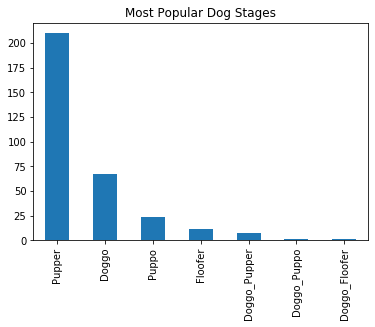

In [654]:
s = np.arange(7)
stages_counts = df.stages.value_counts()
stages_counts.plot(kind = 'bar', title = 'Most Popular Dog Stages')
plt.xticks(s, ('Pupper', 'Doggo', 'Puppo', 'Floofer', 'Doggo_Pupper', 'Doggo_Puppo', 'Doggo_Floofer'));

pupper is the most famous one with a huge difference

## retweets_count & Image number correlation

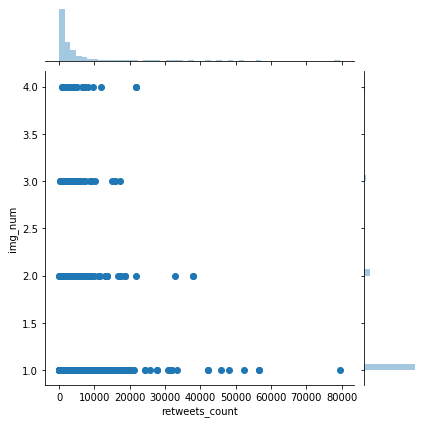

In [655]:
x = df_clean.retweets_count
y = df_clean.img_num
sns.jointplot(x, y, data=df);

less Images give more retweets, what about the favorites? Ithink it would be the same but i will check

## favorites_count & Image number correlation

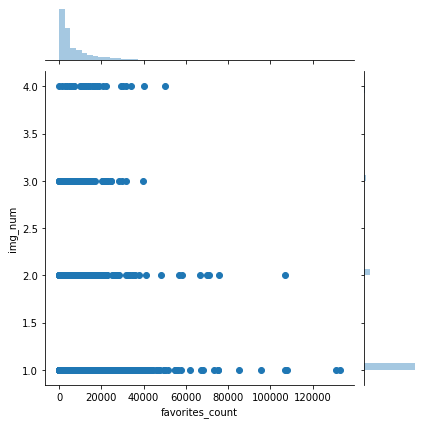

In [656]:
x = df_clean.favorites_count
y = df_clean.img_num
sns.jointplot(x, y, data=df);

wow it is very close

### img_num and stages

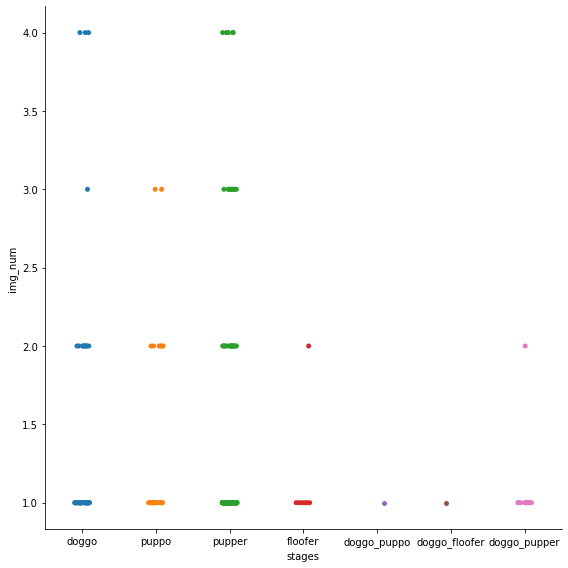

In [657]:
sns.catplot(x="stages", y="img_num",data=df, size=8);

We can see that the majority use 1 or 2 images 

<a id='#Resources'></a>
## Resources
* https://stackoverflow.com/questions/10628262/inserting-image-into-ipython-notebook-markdown
* https://docs.python.org/3.1/library/re.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
* https://seaborn.pydata.org/tutorial/distributions.html